In [715]:
import sys
assert sys.version_info >= (3,7) ,'too low version'

In [716]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [717]:
import numpy as np
np.random.permutation(10)

array([2, 4, 7, 0, 3, 6, 8, 1, 9, 5])

In [718]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [719]:
print(housing.head(20))
housing.describe()

    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.230    37.880              41.000      880.000         129.000   
1    -122.220    37.860              21.000     7099.000        1106.000   
2    -122.240    37.850              52.000     1467.000         190.000   
3    -122.250    37.850              52.000     1274.000         235.000   
4    -122.250    37.850              52.000     1627.000         280.000   
5    -122.250    37.850              52.000      919.000         213.000   
6    -122.250    37.840              52.000     2535.000         489.000   
7    -122.250    37.840              52.000     3104.000         687.000   
8    -122.260    37.840              42.000     2555.000         665.000   
9    -122.250    37.840              52.000     3549.000         707.000   
10   -122.260    37.850              52.000     2202.000         434.000   
11   -122.260    37.850              52.000     3503.000         752.000   
12   -122.26

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


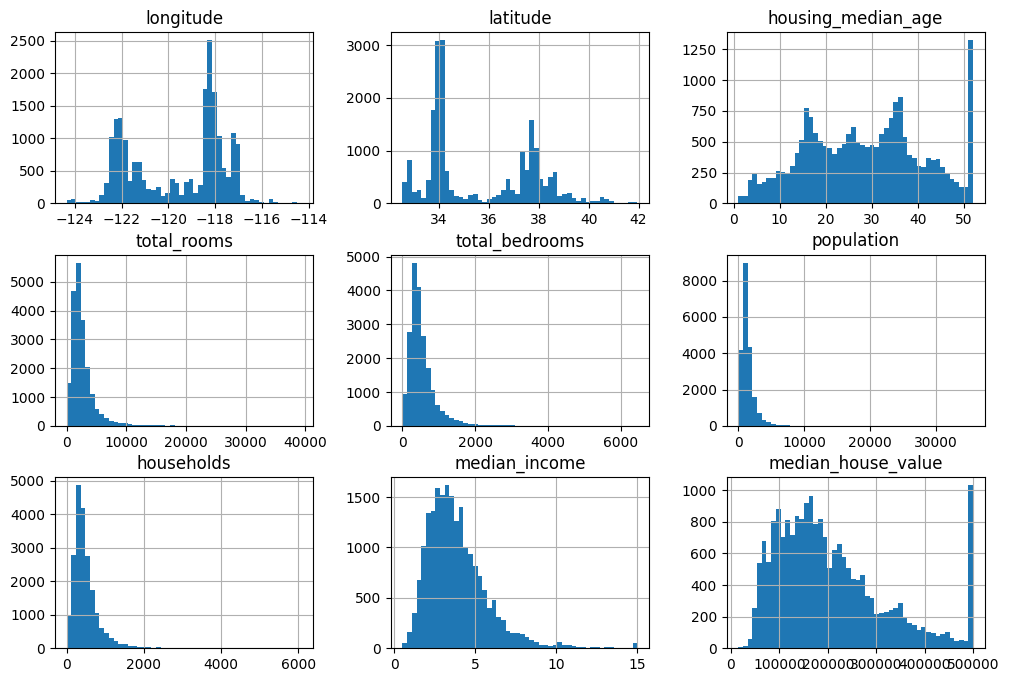

In [720]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))

plt.show()

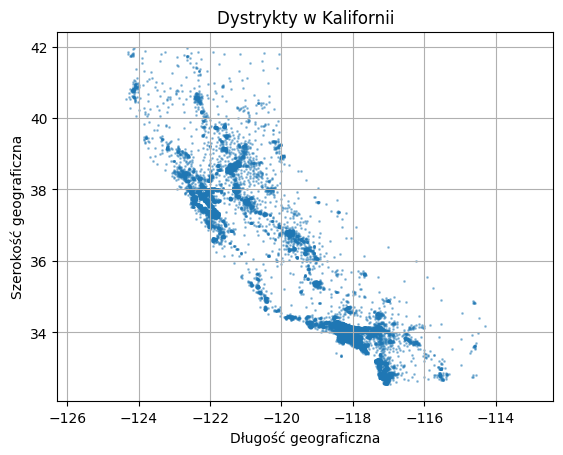

In [721]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, s=1)
plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.title('Dystrykty w Kalifornii')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='datalim')  # Set an equal aspect ratio
plt.show()

In [722]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\Szymon\AppData\Local\Temp\ipykernel_8736\2352451982.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.000,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.000,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.000,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.000,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.000,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [723]:
'''import matplotlib.colors as cl
floatscol = housing.select_dtypes(include=['float']).drop(['longitude','latitude'],axis=1)
columns = floatscol.columns
fig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))
axes = axes.flatten()
for i, column in enumerate(columns):
    ax = axes[i]  # Przypisanie bieżącej osi z listy osi
    plt.sca(ax)
    countries.plot(color='grey', ax=ax)
    ax.axis([-125, -114, 32, 43])
    c = housing[column]
    norm = cl.Normalize(vmin=min(c), vmax=max(c))
    sc = ax.scatter(housing['longitude'], housing['latitude'], s=1, c=c, norm=norm, cmap='jet')
    plt.colorbar(mappable=sc, cmap='jet', ax=ax)  # Dodanie paska kolorów do bieżącej osi
    ax.set_xlabel('Długość geograficzna')
    ax.set_ylabel('Szerokość geograficzna')
    ax.set_title(column)
    ax.grid(True)

# Ukrycie pozostałych osi, jeśli liczba kolumn nie jest wielokrotnością 3
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()'''

"import matplotlib.colors as cl\nfloatscol = housing.select_dtypes(include=['float']).drop(['longitude','latitude'],axis=1)\ncolumns = floatscol.columns\nfig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))\naxes = axes.flatten()\nfor i, column in enumerate(columns):\n    ax = axes[i]  # Przypisanie bieżącej osi z listy osi\n    plt.sca(ax)\n    countries.plot(color='grey', ax=ax)\n    ax.axis([-125, -114, 32, 43])\n    c = housing[column]\n    norm = cl.Normalize(vmin=min(c), vmax=max(c))\n    sc = ax.scatter(housing['longitude'], housing['latitude'], s=1, c=c, norm=norm, cmap='jet')\n    plt.colorbar(mappable=sc, cmap='jet', ax=ax)  # Dodanie paska kolorów do bieżącej osi\n    ax.set_xlabel('Długość geograficzna')\n    ax.set_ylabel('Szerokość geograficzna')\n    ax.set_title(column)\n    ax.grid(True)\n\n# Ukrycie pozostałych osi, jeśli liczba kolumn nie jest wielokrotnością 3\nfor i in range(len(columns), len(axes)):\n    axes[i].axis('off')\n\nplt

In [724]:
'''fig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))
axes= axes.flatten()
cal = plt.imread('california.png')
for i, column in enumerate(columns):
    ax = axes[i]
    axis = [-125, -114, 32, 43]
    ax.axis(axis)
    ax.imshow(cal,extent=axis)
    housing.sort_values(by=column,inplace=True)
    norm = (housing[column] - min(housing[column])) / (max(housing[column]) - min(housing[column]))
    housing.plot(kind='scatter', x='longitude',y='latitude',c=column, colorbar=True, 
                 cmap='jet', title=column,ax=ax,s=norm * 20)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()
'''

"fig, axes = plt.subplots(nrows=(len(columns)/3).__ceil__(), ncols=3,figsize = (10, 8))\naxes= axes.flatten()\ncal = plt.imread('california.png')\nfor i, column in enumerate(columns):\n    ax = axes[i]\n    axis = [-125, -114, 32, 43]\n    ax.axis(axis)\n    ax.imshow(cal,extent=axis)\n    housing.sort_values(by=column,inplace=True)\n    norm = (housing[column] - min(housing[column])) / (max(housing[column]) - min(housing[column]))\n    housing.plot(kind='scatter', x='longitude',y='latitude',c=column, colorbar=True, \n                 cmap='jet', title=column,ax=ax,s=norm * 20)\nfor j in range(i + 1, len(axes)):\n    axes[j].set_visible(False)\nplt.tight_layout()\nplt.show()\n"

(array([4199.00, 8974.00, 4340.00, 1584.00, 719.00, 330.00, 189.00, 91.00,
        56.00, 45.00, 50.00, 13.00, 14.00, 13.00, 5.00, 4.00, 3.00, 3.00,
        2.00, 0.00, 0.00, 2.00, 2.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
        1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]),
 array([3.00, 716.58, 1430.16, 2143.74, 2857.32, 3570.90, 4284.48, 4998.06,
        5711.64, 6425.22, 7138.80, 7852.38, 8565.96, 9279.54, 9993.12,
        10706.70, 11420.28, 12133.86, 12847.44, 13561.02, 14274.60,
        14988.18, 15701.76, 16415.34, 17128.92, 17842.50, 18556.08,
        19269.66, 19983.24, 20696.82, 21410.40, 22123.98, 22837.56,
        23551.14, 24264.72, 24978.30, 25691.88, 26405.46, 27119.04,
        27832.62, 28546.20, 29259.78, 29973.36, 30686.94, 31400.52,
        32114.10, 32827.68, 33541.26, 34254.84, 34968.42, 35682.00]),
 <BarContainer object of 50 artists>)

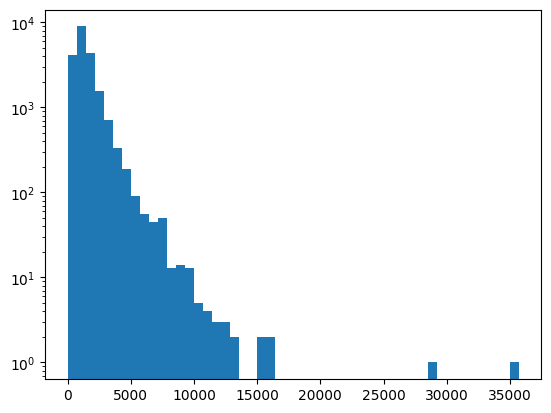

In [725]:
pop = housing
pop.sort_values(by='population',inplace=True,ascending=False)
plt.hist(x=pop['population'],bins=50,log=True)


(20000.0, 21000.0, 14.0, 16.0)

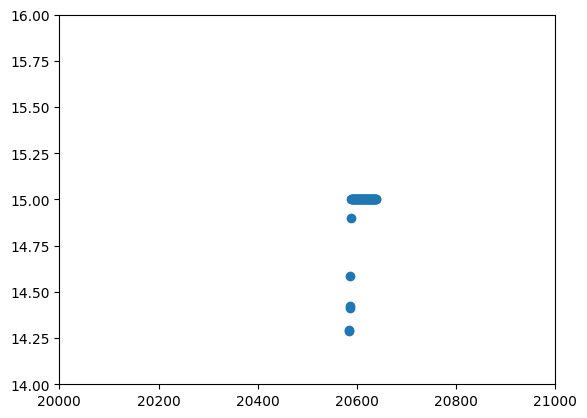

In [726]:
#housing.describe()
housing.sort_values(by='median_income',ascending=True,inplace=True,ignore_index=True)
plt.scatter(housing.index,housing['median_income'])
plt.axis([20000,21000,14,16])

In [727]:
def split_train_test(test_part, df):
    np.random.seed(42)
    idx = np.random.permutation(np.arange(len(df)))
    print(idx)
    test_idx = idx[:int(len(df) * test_part)]
    train_idx = idx[int(len(df) * test_part):]
    train_set = df.iloc[train_idx] 
    test_set = df.iloc[test_idx]
    return train_set, test_set


In [728]:
housing_train, housing_test = split_train_test(0.2,housing)

[20046  3024 15663 ...  5390   860 15795]


<Axes: xlabel='income_cat'>

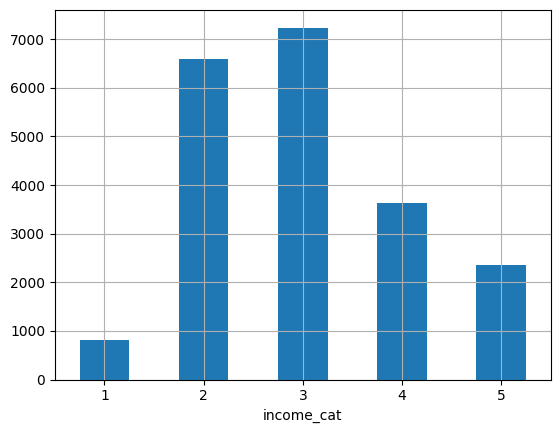

In [729]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=np.arange(1,6))
housing['income_cat'].value_counts().sort_index().plot.bar(grid=True,rot=0)

In [730]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [731]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [732]:
strat_train_set, strat_test_set = strat_splits[5]

In [733]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [734]:
strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

income_cat
1   0.040
2   0.319
3   0.351
4   0.176
5   0.114
Name: count, dtype: float64

In [735]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.980,4.000,3.680,0.360,-7.540
2,31.880,31.880,31.810,-0.020,-0.240
3,35.060,35.050,35.150,-0.010,0.260
4,17.630,17.640,17.970,0.030,1.950
5,11.440,11.430,11.390,-0.080,-0.510


In [736]:
overall = housing['income_cat'].value_counts().sort_index() / len(housing)

train, test = train_test_split(housing, test_size=0.2, random_state=42)
random = test['income_cat'].value_counts().sort_index() / len(test)

strat = strat_test_set['income_cat'].value_counts().sort_index() / len(strat_test_set)

comp_split = pd.DataFrame(data={'Overall %': overall, 'Random %': random, 'Strat %':strat
                                ,'rnd dif': abs(overall - random), 'strat dif': abs(overall - strat)})
comp_split = (comp_split * 100).round(2)
comp_split

,Overall %,Random %,Strat %,rnd dif,strat dif
income_cat,,,,,
1,3.980,3.680,4.000,0.300,0.010
2,31.880,31.810,31.880,0.080,0.000
3,35.060,35.150,35.050,0.090,0.000
4,17.630,17.970,17.640,0.340,0.000
5,11.440,11.390,11.430,0.060,0.010


In [737]:
corr_matrix = housing.drop(labels=['ocean_proximity'],axis=1).corr()

In [738]:
med_val_corr= corr_matrix['median_house_value'].sort_values(ascending=False)

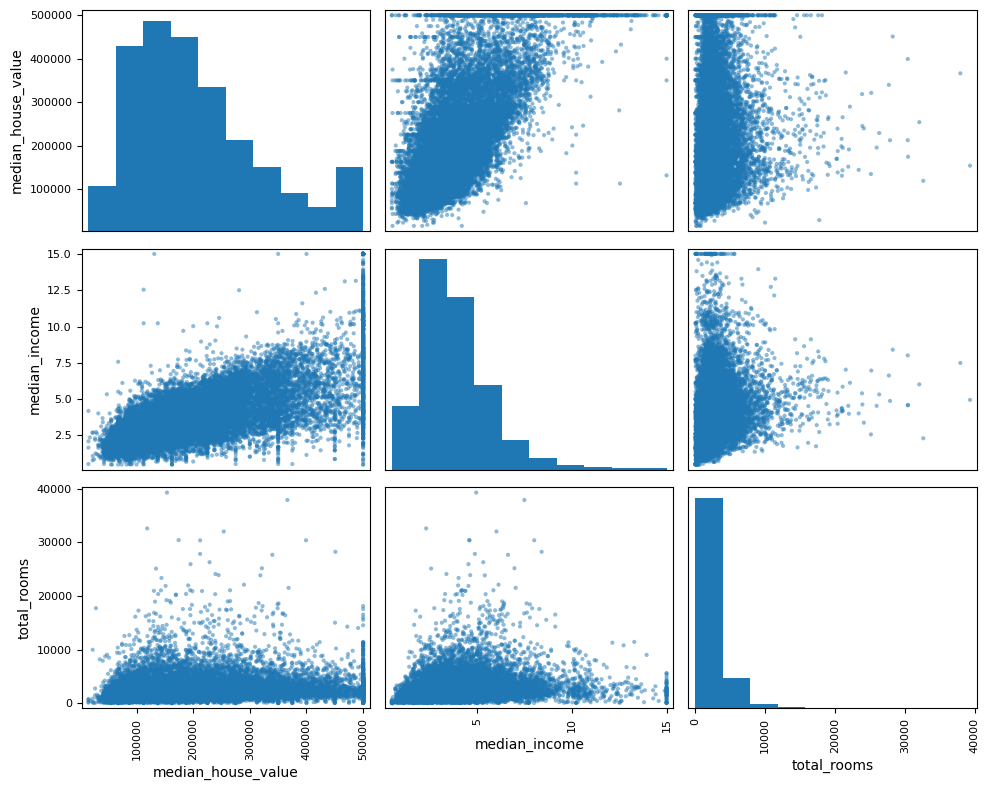

In [739]:
from pandas.plotting import scatter_matrix
atributes = med_val_corr.index[:4]
scatter_matrix(housing[atributes], figsize=(10,8))
plt.tight_layout()
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

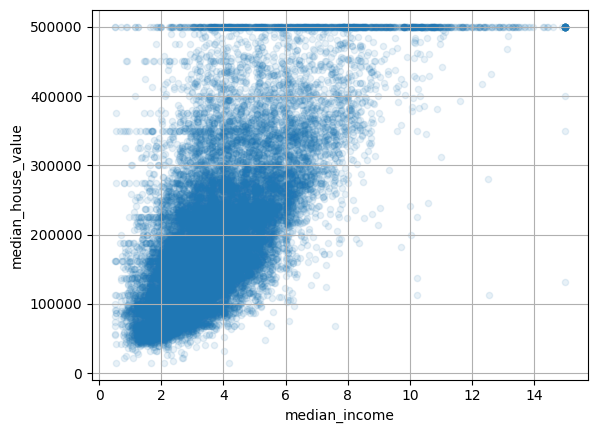

In [740]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)

In [741]:
def delete_repetitions(df: pd.DataFrame, col: str, min_rep: int):
    df.sort_values(by=col, inplace=True,ascending=False)
    df.reset_index(inplace=True)
    df.drop(labels=['index'],axis=1,inplace=True)
    rep_count = 0
    prev = None  
    index_to_drop = []
    for i, value in df[col].items(): 
        if value == prev:
            rep_count += 1
        else:
            if rep_count > min_rep:
                index_to_drop.extend(df.index[i-rep_count-1 : i])  
            rep_count = 0 
        prev = value

    index_to_drop.extend(df.index[len(df)-rep_count:len(df)])
    #print('do wywalenia: ',len(index_to_drop))
    #a = len(df)
    #drops = pd.DataFrame()
    #drops = df.iloc[index_to_drop]
    #drops.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)
    #print('wywalono: ',a - len(df))
    #print(drops['median_house_value'].value_counts().sort_index())
    return df.drop(index=index_to_drop,axis=0)

housing_clean = delete_repetitions(housing, 'median_house_value', 20)



<Axes: xlabel='median_income', ylabel='median_house_value'>

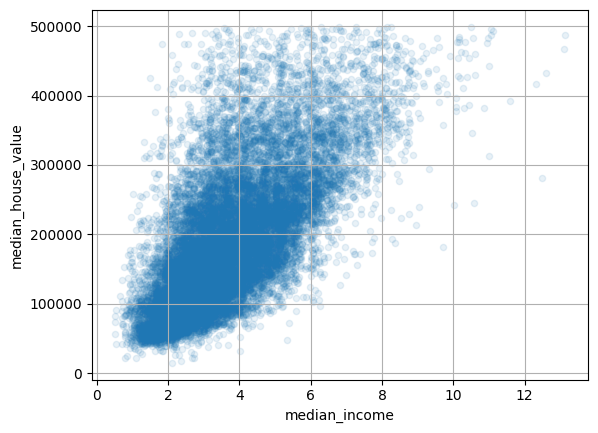

In [742]:
housing_clean.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)

In [743]:
housing_clean['rooms_per_famillyN'] = housing_clean['total_rooms'] / housing_clean['households']
housing_clean['bedrooms_factorN'] = 1 / (housing_clean['total_bedrooms'] / housing_clean['total_rooms'])
housing_clean['fam_pop_factorN'] = 1 / (housing_clean['population'] / housing_clean['households'])
#housing.drop(labels=['index','level_0'],inplace=True,axis=1)
housing_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_famillyN,bedrooms_factorN,fam_pop_factorN
992,-117.770,33.550,28.000,2024.000,297.000,617.000,274.000,6.786,499100.000,<1H OCEAN,5,7.387,6.815,0.444
993,-122.180,37.890,18.000,4845.000,735.000,1634.000,734.000,8.149,499000.000,NEAR BAY,5,6.601,6.592,0.449
994,-122.060,37.330,29.000,1945.000,269.000,826.000,275.000,8.248,498800.000,<1H OCEAN,5,7.073,7.230,0.333
995,-118.310,34.130,40.000,2822.000,443.000,907.000,414.000,7.269,498700.000,<1H OCEAN,5,6.816,6.370,0.456
996,-117.990,33.950,30.000,2217.000,284.000,851.000,291.000,10.483,498600.000,<1H OCEAN,5,7.619,7.806,0.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20632,-116.570,35.430,8.000,9975.000,1743.000,6835.000,1439.000,2.714,22500.000,INLAND,2,6.932,5.723,0.211
20633,-122.320,37.930,33.000,296.000,73.000,216.000,63.000,2.675,22500.000,NEAR BAY,2,4.698,4.055,0.292
20634,-117.160,32.710,52.000,845.000,451.000,1230.000,375.000,1.092,22500.000,NEAR OCEAN,1,2.253,1.874,0.305
20635,-118.330,34.150,39.000,493.000,168.000,259.000,138.000,2.367,17500.000,<1H OCEAN,2,3.572,2.935,0.533


In [744]:
correl_new = housing_clean.drop(labels=['ocean_proximity'],axis=1).corr()
correl_new['median_house_value'].sort_values(ascending=False)

median_house_value    1.000
median_income         0.680
income_cat            0.646
bedrooms_factorN      0.361
fam_pop_factorN       0.247
rooms_per_famillyN    0.153
total_rooms           0.146
households            0.090
total_bedrooms        0.069
housing_median_age    0.063
population            0.007
longitude            -0.046
latitude             -0.155
Name: median_house_value, dtype: float64

In [745]:
strat_train_set, strat_test_set = train_test_split(housing_clean, test_size=0.2,stratify=housing_clean['income_cat'],random_state=42)

In [746]:
housing_clean = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [747]:
housing_clean.isna().sum()
isna_id=housing_clean[housing_clean['total_bedrooms'].isna() == True]['total_bedrooms'].index.to_numpy()
nans_bool = housing_clean['total_bedrooms'].isna()

In [748]:
imputing_method = 5
housing_clean_num = housing_clean.select_dtypes(include=np.number)

if imputing_method == 1: 
    # 1 opcja - usun wiersze z NAN
    dropna = housing_clean.dropna()
    dropna.isna().sum()


elif imputing_method == 2:
    # 2 opcja pozbyć się całych atrybutów
    dropcol = housing_clean.drop(labels=['total_bedrooms','bedrooms_factorN'],axis=1)


elif imputing_method == 3:
    # 3 opcja, uzupełnienie medianą
    housing_clean['total_bedrooms'].fillna(housing_clean['total_bedrooms'].median(), inplace=True)
    housing_clean['bedrooms_factorN'].fillna(housing_clean['bedrooms_factorN'].median(), inplace=True)


elif imputing_method == 4:
    # 4 opcja - imputer z sklearn, to samo co mediana
    from sklearn.impute import SimpleImputer
    inputer = SimpleImputer(strategy='median')
    inputer.fit(housing_clean_num)
    X = inputer.transform(housing_clean_num)


elif imputing_method == 5:
    # 5 opcja- imputer regresyjny
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    it_im = IterativeImputer()
    it_im.fit(housing_clean_num)
    X = it_im.transform(housing_clean_num)
    

housing_clean = pd.DataFrame(data=X, columns=housing_clean_num.columns, index=housing_clean_num.index)
#housing_clean.loc[nans_bool]
it_im.get_params()


{'add_indicator': False,
 'estimator': None,
 'fill_value': None,
 'imputation_order': 'ascending',
 'initial_strategy': 'mean',
 'keep_empty_features': False,
 'max_iter': 10,
 'max_value': inf,
 'min_value': -inf,
 'missing_values': nan,
 'n_nearest_features': None,
 'random_state': None,
 'sample_posterior': False,
 'skip_complete': False,
 'tol': 0.001,
 'verbose': 0}

In [749]:
print(inputer.statistics_)
print(housing_clean_num.median().values)

[-118.51 34.27 28.00 2191.00 444.00 1213.00 419.00 3.54 5.26 4.96 0.35]
[-118.51 34.27 28.00 2191.00 444.00 1213.00 419.00 3.54 5.26 4.96 0.35]


In [750]:
housing_clean = pd.concat([housing_clean, strat_train_set['ocean_proximity']], axis=1)

In [751]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

housing_cat = housing_clean[['ocean_proximity']]
housing_cat_encoded = encoder.fit_transform(housing_cat) 
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [752]:
from sklearn.preprocessing import OneHotEncoder

hot_encoder = OneHotEncoder()
housing_cat_hot_encoded = hot_encoder.fit_transform(housing_cat)
housing_cat_hot_encoded.toarray()

array([[1.00, 0.00, 0.00, 0.00, 0.00],
       [1.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 1.00, 0.00, 0.00, 0.00],
       ...,
       [1.00, 0.00, 0.00, 0.00, 0.00],
       [0.00, 1.00, 0.00, 0.00, 0.00],
       [1.00, 0.00, 0.00, 0.00, 0.00]])

In [753]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [754]:
# srednia zbioru, który pomniejszono o jego średnią wynosi 0
losowy = np.random.randint(-1000, 1000,20)
losowy = losowy - losowy.mean()
losowy.mean()

2.2737367544323207e-14

In [767]:
# min/max, std automatycznie
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

housing_clean_mm = mm_scaler.fit_transform(housing_clean_num)
housing_clean_std = std_scaler.fit_transform(housing_clean_num)

housing_clean_mm = pd.DataFrame(data=housing_clean_mm, columns=housing_clean_num.columns, index=housing_clean_num.index)
housing_clean_std = pd.DataFrame(data=housing_clean_std, columns=housing_clean_num.columns, index=housing_clean_num.index)
housing_clean_std


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_famillyN,bedrooms_factorN,fam_pop_factorN
12558,1.150,-0.934,-1.474,-0.486,-0.559,-0.684,-0.737,-0.159,0.853,0.204,-0.436
14249,0.553,-0.660,-1.394,2.897,3.918,5.131,4.037,-0.162,-0.500,-0.830,-0.834
20111,-1.299,1.990,0.301,-0.166,-0.175,-0.144,-0.171,-0.982,-0.081,-0.075,-0.224
9765,0.702,-0.757,1.269,-0.966,-0.819,-0.809,-0.777,-1.095,-1.356,-1.972,0.138
11619,1.205,-1.348,-0.022,0.141,0.491,-0.133,0.485,-0.684,-0.546,-0.949,1.912
...,...,...,...,...,...,...,...,...,...,...,...
2460,-1.220,0.637,-0.587,1.457,0.968,1.042,1.069,1.376,0.523,1.096,-0.102
15966,0.887,-0.739,-0.829,0.409,0.529,1.300,0.670,0.140,-0.359,-0.314,-1.105
15920,0.672,-0.822,0.866,-0.526,-0.444,-0.078,-0.401,-0.652,-0.548,-0.669,-1.159
18687,-0.134,0.531,-0.990,1.547,1.550,1.764,1.646,-0.407,-0.021,0.069,-0.303


In [766]:
# min/max, std ręcznie
housing_clean_mm_manual = (housing_clean_num - housing_clean_num.min().values) / (housing_clean_num.max().values - housing_clean_num.min().values)
housing_clean_std_manual = (housing_clean_num - housing_clean_num.mean().values) / housing_clean_num.std().values

housing_clean_mm_manual = pd.DataFrame(data=housing_clean_mm_manual, columns=housing_clean_num.columns, index=housing_clean_num.index)
housing_clean_std_manual = pd.DataFrame(data=housing_clean_std_manual, columns=housing_clean_num.columns, index=housing_clean_num.index)
housing_clean_std_manual

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_famillyN,bedrooms_factorN,fam_pop_factorN
12558,1.150,-0.934,-1.474,-0.486,-0.559,-0.684,-0.737,-0.159,0.853,0.204,-0.436
14249,0.553,-0.660,-1.394,2.897,3.918,5.131,4.037,-0.162,-0.500,-0.830,-0.834
20111,-1.299,1.990,0.301,-0.166,-0.175,-0.144,-0.171,-0.982,-0.081,-0.075,-0.224
9765,0.702,-0.757,1.269,-0.966,-0.819,-0.809,-0.777,-1.095,-1.356,-1.972,0.138
11619,1.205,-1.348,-0.022,0.141,0.491,-0.133,0.485,-0.684,-0.546,-0.949,1.911
...,...,...,...,...,...,...,...,...,...,...,...
2460,-1.220,0.637,-0.587,1.457,0.968,1.042,1.069,1.376,0.523,1.096,-0.102
15966,0.886,-0.739,-0.829,0.409,0.529,1.300,0.670,0.140,-0.359,-0.314,-1.105
15920,0.672,-0.822,0.866,-0.526,-0.444,-0.078,-0.401,-0.652,-0.548,-0.669,-1.159
18687,-0.134,0.530,-0.990,1.547,1.550,1.764,1.646,-0.407,-0.021,0.069,-0.303
